# ทำนายผลผลิตข้าวโพด โดยใช้ผลผลิตปีก่อน ๆ ด้วย Prophet

https://facebook.github.io/prophet/docs/quick_start.html

In [1]:
import numpy as np
import pandas as pd
from fbprophet import Prophet

import plotly.offline as py
import plotly.graph_objs as go

from fbprophet.plot import plot_plotly, plot_components_plotly

py.init_notebook_mode(connected=True)

----
## Get Yield Data

In [2]:
yield_file = 'OAE-process/OAE-ผลผลิตข้าวโพดทั้งหมด.xlsx'
df = pd.read_excel(yield_file)
df.head()

,date,product,key,area,lng,lat,value,unit,type,freq,level
0,2019-01-01,ข้าวโพด,ผลผลิตข้าวโพดทั้งหมด,Chiang Rai,19.899547,99.909809,3520,ตัน,volume,month,local
1,2019-01-01,ข้าวโพด,ผลผลิตข้าวโพดทั้งหมด,Phayao,19.215928,100.205901,1179,ตัน,volume,month,local
2,2019-01-01,ข้าวโพด,ผลผลิตข้าวโพดทั้งหมด,Lampang,18.297781,99.496366,6957,ตัน,volume,month,local
3,2019-01-01,ข้าวโพด,ผลผลิตข้าวโพดทั้งหมด,Lamphun,18.596625,99.011293,667,ตัน,volume,month,local
4,2019-01-01,ข้าวโพด,ผลผลิตข้าวโพดทั้งหมด,Chiang Mai,18.860754,98.966858,3718,ตัน,volume,month,local


Show areas with the maximum yield in the last 5 years.

In [3]:
df.groupby(['area']).sum().sort_values(by='value', ascending=False).head()

,lng,lat,value
area,,,
Phetchabun,864.630711,5358.773025,2510190
Nakhon Ratchasima,795.257633,5407.582633,1976058
Nan,996.372493,5341.332103,1874754
Tak,895.148217,5251.911033,1556337
Loei,927.586973,5390.832778,1416855


Get yield of one area.

In [4]:
def data_in_area(df, area):
    df = df.sort_values(by='date', ascending=False)
    df_area = df[df.area == area].reset_index()
    df_area = df_area[['date', 'value']]
    df_area.columns = ['ds', 'y']
    return df_area

In [5]:
df_nan = data_in_area(df, 'Nan')
df_nan.head()

,ds,y
0,2019-05-01,6305
1,2019-04-01,12230
2,2019-03-01,4105
3,2019-02-01,8387
4,2019-01-01,30758


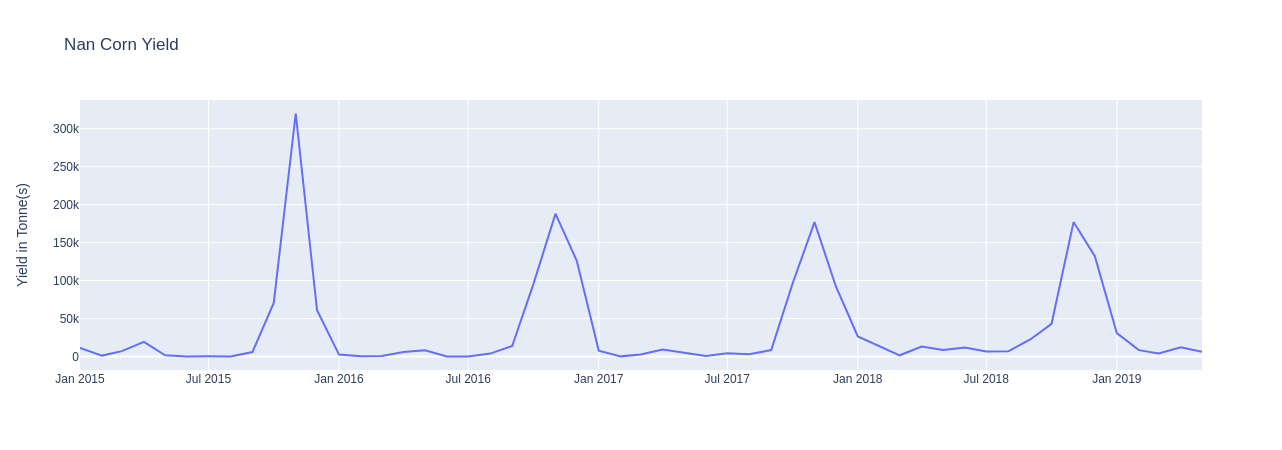

In [6]:
py.iplot({'data':go.Scatter(x=df_nan['ds'], y=df_nan['y'], name='y'),
         'layout':dict(title = 'Nan Corn Yield',
                       yaxis = dict(title = 'Yield in Tonne(s)'))
         })

### Read additional data

In [7]:
cost_file = 'OAE-process/OAE-ต้นทุนรวมต่อไร่ข้าวโพดเลี้ยงสัตว์.xlsx'
df_cost = pd.read_excel(cost_file)
df_cost

,date,product,key,area,lng,lat,value,unit,type,freq,level
0,2020-01-01,ข้าวโพด,ต้นทุนรวมต่อไร่ข้าวโพดเลี้ยงสัตว์,Thailand,13.758408,100.501938,4406.69,บาท/ไร่,value,year,local
1,2019-01-01,ข้าวโพด,ต้นทุนรวมต่อไร่ข้าวโพดเลี้ยงสัตว์,Thailand,13.758408,100.501938,4363.35,บาท/ไร่,value,year,local
2,2018-01-01,ข้าวโพด,ต้นทุนรวมต่อไร่ข้าวโพดเลี้ยงสัตว์,Thailand,13.758408,100.501938,4421.48,บาท/ไร่,value,year,local
3,2017-01-01,ข้าวโพด,ต้นทุนรวมต่อไร่ข้าวโพดเลี้ยงสัตว์,Thailand,13.758408,100.501938,4486.91,บาท/ไร่,value,year,local
4,2016-01-01,ข้าวโพด,ต้นทุนรวมต่อไร่ข้าวโพดเลี้ยงสัตว์,Thailand,13.758408,100.501938,4458.90,บาท/ไร่,value,year,local
5,2015-01-01,ข้าวโพด,ต้นทุนรวมต่อไร่ข้าวโพดเลี้ยงสัตว์,Thailand,13.758408,100.501938,4526.63,บาท/ไร่,value,year,local


In [8]:
def resample_year2month(df):
    df = df.set_index('date')
    df.index.name = 'ds'
    return df.resample('MS').asfreq().fillna(method='ffill')
    
df_cost_spl = resample_year2month(df_cost)
df_cost_spl.sort_index(ascending=False)

,product,key,area,lng,lat,value,unit,type,freq,level
ds,,,,,,,,,,
2020-01-01,ข้าวโพด,ต้นทุนรวมต่อไร่ข้าวโพดเลี้ยงสัตว์,Thailand,13.758408,100.501938,4406.69,บาท/ไร่,value,year,local
2019-12-01,ข้าวโพด,ต้นทุนรวมต่อไร่ข้าวโพดเลี้ยงสัตว์,Thailand,13.758408,100.501938,4363.35,บาท/ไร่,value,year,local
2019-11-01,ข้าวโพด,ต้นทุนรวมต่อไร่ข้าวโพดเลี้ยงสัตว์,Thailand,13.758408,100.501938,4363.35,บาท/ไร่,value,year,local
2019-10-01,ข้าวโพด,ต้นทุนรวมต่อไร่ข้าวโพดเลี้ยงสัตว์,Thailand,13.758408,100.501938,4363.35,บาท/ไร่,value,year,local
2019-09-01,ข้าวโพด,ต้นทุนรวมต่อไร่ข้าวโพดเลี้ยงสัตว์,Thailand,13.758408,100.501938,4363.35,บาท/ไร่,value,year,local
...,...,...,...,...,...,...,...,...,...,...
2015-05-01,ข้าวโพด,ต้นทุนรวมต่อไร่ข้าวโพดเลี้ยงสัตว์,Thailand,13.758408,100.501938,4526.63,บาท/ไร่,value,year,local
2015-04-01,ข้าวโพด,ต้นทุนรวมต่อไร่ข้าวโพดเลี้ยงสัตว์,Thailand,13.758408,100.501938,4526.63,บาท/ไร่,value,year,local
2015-03-01,ข้าวโพด,ต้นทุนรวมต่อไร่ข้าวโพดเลี้ยงสัตว์,Thailand,13.758408,100.501938,4526.63,บาท/ไร่,value,year,local


In [9]:
precipitation_file = 'OAE-process/OAE-ปริมาณน้ำฝน-ฝนตก.xlsx'
df_precipitation = pd.read_excel(precipitation_file)
df_precipitation_nan = data_in_area(df_precipitation,'Nan').set_index('ds')
df_precipitation_nan.sort_index(ascending=False)

,y
ds,
2020-12-01,22.09
2020-11-01,23.18
2020-10-01,56.70
2020-09-01,194.06
2020-08-01,323.94
...,...
2015-05-01,68.55
2015-04-01,136.02
2015-03-01,37.35


In [10]:
rainday_file = 'OAE-process/OAE-ปริมาณน้ำฝน-จำนวนวันฝนตก.xlsx'
df_rainday = pd.read_excel(rainday_file)
df_rainday_nan = data_in_area(df_rainday,'Nan').set_index('ds')
df_rainday_nan.sort_index(ascending=False)

,y
ds,
2020-12-01,4.8
2020-11-01,7.4
2020-10-01,16.5
2020-09-01,24.5
2020-08-01,29.6
...,...
2015-05-01,21.0
2015-04-01,14.0
2015-03-01,8.0


In [11]:
havest_file = 'OAE-process/OAE-พื้นที่เก็บเกี่ยวข้าวโพดทั้งหมด.xlsx'
df_havest = pd.read_excel(havest_file)
data_in_area(df_havest,'Nan')

,ds,y
0,2018-01-01,678974
1,2017-01-01,662502
2,2016-01-01,731978
3,2015-01-01,808102


In [12]:
farm_file = 'OAE-process/OAE-พื้นที่เพาะปลูกข้าวโพดทั้งหมด.xlsx'
df_farm = pd.read_excel(farm_file)
data_in_area(df_havest,'Nan')

,ds,y
0,2018-01-01,678974
1,2017-01-01,662502
2,2016-01-01,731978
3,2015-01-01,808102


In [13]:
price_file = 'OAE-process/OAE-ราคาข้าวโพดเลี้ยงสัตว์.xlsx'
df_price = pd.read_excel(price_file)
df_price_spl = df_price.set_index('date')
df_price_spl.sort_index(ascending=False)

,product,key,area,lng,lat,value,unit,type,freq,level
date,,,,,,,,,,
2020-07-01,ข้าวโพดเลี้ยงสัตว์,ราคาข้าวโพดเลี้ยงสัตว์,Thailand,13.758408,100.501938,8.10,บาท/กก.,value,month,local
2020-06-01,ข้าวโพดเลี้ยงสัตว์,ราคาข้าวโพดเลี้ยงสัตว์,Thailand,13.758408,100.501938,7.92,บาท/กก.,value,month,local
2020-05-01,ข้าวโพดเลี้ยงสัตว์,ราคาข้าวโพดเลี้ยงสัตว์,Thailand,13.758408,100.501938,7.72,บาท/กก.,value,month,local
2020-04-01,ข้าวโพดเลี้ยงสัตว์,ราคาข้าวโพดเลี้ยงสัตว์,Thailand,13.758408,100.501938,7.49,บาท/กก.,value,month,local
2020-03-01,ข้าวโพดเลี้ยงสัตว์,ราคาข้าวโพดเลี้ยงสัตว์,Thailand,13.758408,100.501938,7.42,บาท/กก.,value,month,local
...,...,...,...,...,...,...,...,...,...,...
2015-05-01,ข้าวโพดเลี้ยงสัตว์,ราคาข้าวโพดเลี้ยงสัตว์,Thailand,13.758408,100.501938,8.33,บาท/กก.,value,month,local
2015-04-01,ข้าวโพดเลี้ยงสัตว์,ราคาข้าวโพดเลี้ยงสัตว์,Thailand,13.758408,100.501938,8.11,บาท/กก.,value,month,local
2015-03-01,ข้าวโพดเลี้ยงสัตว์,ราคาข้าวโพดเลี้ยงสัตว์,Thailand,13.758408,100.501938,8.18,บาท/กก.,value,month,local


----

## Model 1: Prophet default parameters with harvesting season and additional features

In [14]:
df_train, df_test = df_nan[12:], df_nan[:12]

def add_features(df):
    df = df.join(df_cost_spl['value'], on='ds').rename(columns={'value':'cost'})
    df = df.join(df_precipitation_nan['y'].rename('precipitation'), on='ds')
    df = df.join(df_rainday_nan['y'].rename('rainday'), on='ds')
    df = df.join(df_price_spl['value'], on='ds').rename(columns={'value':'price'})
    return df.sort_values(by='ds', ascending=False).fillna(method='bfill')
    
    
# df_train = df_train.join(df_cost_spl['value'], on='ds').rename(columns={'value':'cost'})
# df_train = df_train.join(df_precipitation_nan['y'], on='ds', rsuffix='_other').rename(columns={'y_other':'precipitation'})
# df_train = df_train.join(df_rainday_nan['y'], on='ds', rsuffix='_other').rename(columns={'y_other':'rainday'})
# df_train = df_train.join(df_price_spl['value'], on='ds').rename(columns={'value':'price'})
df_train = add_features(df_train)
df_test = add_features(df_test)

In [15]:
# Python
def is_harvest_season(ds):
    date = pd.to_datetime(ds)
    return (date.month >= 10 and date.month <= 12)

df_train['on_season'] = df_train['ds'].apply(is_harvest_season)

In [16]:
df_train.head()

,ds,y,cost,precipitation,rainday,price,on_season
12,2018-05-01,8546,4421.48,161.53,26.0,8.48,False
13,2018-04-01,13077,4421.48,138.19,16.0,8.48,False
14,2018-03-01,1584,4421.48,27.34,10.0,8.30,False
15,2018-02-01,13844,4421.48,15.98,3.0,8.24,False
16,2018-01-01,26475,4421.48,13.57,8.0,8.06,False


In [17]:
model = Prophet(seasonality_prior_scale=0.1, holidays_prior_scale=10)
model.add_seasonality(name='monthly_on_season', period=30.5, fourier_order=5, condition_name='on_season')
for col in ['cost', 'precipitation', 'rainday', 'price']:
    model.add_regressor(col, prior_scale=1, mode='multiplicative')

model.fit(df_train)

future = model.make_future_dataframe(periods=24, freq="MS")
future = add_features(future)
future['on_season'] = future['ds'].apply(is_harvest_season)

forecast = model.predict(future)
forecast.yhat.clip(lower=0, inplace=True)
forecast = forecast.sort_values(by='ds', ascending=False).reset_index().drop(columns=['index'])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
# Sanity check that we are evaluating the forecase at the same date
assert(np.all(forecast[12:24]['ds'].to_numpy() == df_test['ds'].to_numpy()))
# Calculate root mean squared error.
n = len(df_nan['y'])
print('RMSE: %f' % np.sqrt(np.mean((forecast[12:24]['yhat'].to_numpy() - df_test['y'].to_numpy())**2)) )

RMSE: 19857.395670


In [19]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,cost,...,price,price_lower,price_upper,rainday,rainday_lower,rainday_upper,yearly,yearly_lower,yearly_upper,yhat
0,2020-05-01,50737.440681,-5533.769681,34301.783412,50737.433953,50737.448731,-23956.641192,-23956.641192,-23956.641192,-0.216223,...,0.035954,0.035954,0.035954,-0.128777,-0.128777,-0.128777,-23956.641192,-23956.641192,-23956.641192,14629.474616
1,2020-04-01,50362.968314,-4296.763977,36468.252522,50362.962036,50362.975883,-24508.077151,-24508.077151,-24508.077151,-0.216223,...,0.015785,0.015785,0.015785,0.022711,0.022711,0.022711,-24508.077151,-24508.077151,-24508.077151,16023.223402
2,2020-03-01,49976.013534,-9599.789841,31396.955183,49976.007605,49976.020555,-33682.098208,-33682.098208,-33682.098208,-0.216223,...,0.009646,0.009646,0.009646,0.194398,0.194398,0.194398,-33682.098208,-33682.098208,-33682.098208,10039.671236
3,2020-02-01,49614.023579,-6550.447813,33016.494742,49614.018118,49614.030148,-33282.265524,-33282.265524,-33282.265524,-0.216223,...,0.013154,0.013154,0.013154,0.261052,0.261052,0.261052,-33282.265524,-33282.265524,-33282.265524,12177.107384
4,2020-01-01,49227.068800,-788.142397,42801.736555,49227.063732,49227.075058,-24696.048558,-24696.048558,-24696.048558,-0.216223,...,0.043847,0.043847,0.043847,0.198437,0.198437,0.198437,-24696.048558,-24696.048558,-24696.048558,20589.783395


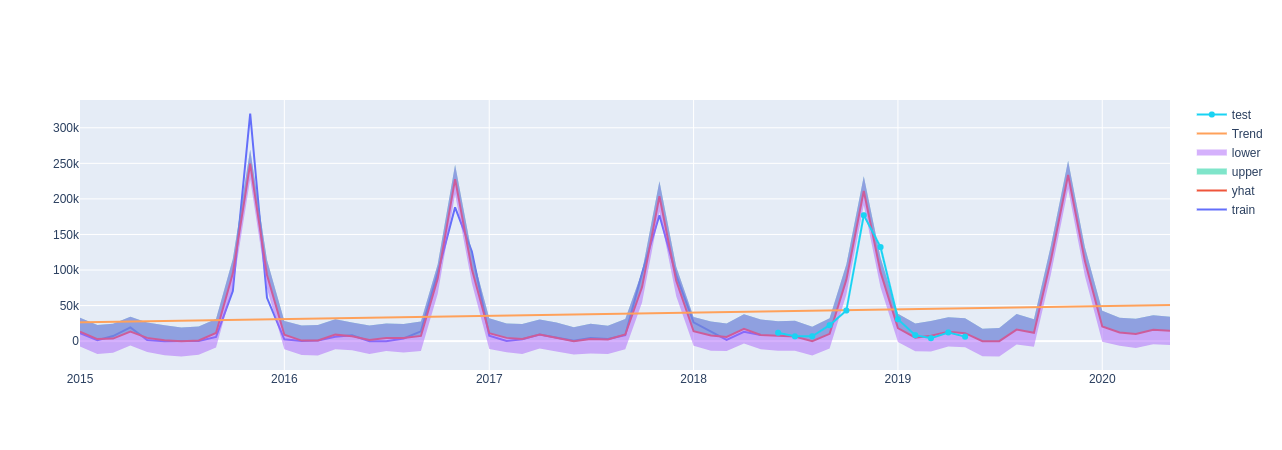

In [20]:
py.iplot([
    go.Scatter(x=df_train['ds'], y=df_train['y'], name='train'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='yhat'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill='tonexty', mode='none', name='upper'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill='tonexty', mode='none', name='lower'),
    go.Scatter(x=forecast['ds'], y=forecast['trend'], name='Trend'),
    go.Scatter(x=df_test['ds'], y=df_test['y'], name='test'),
])

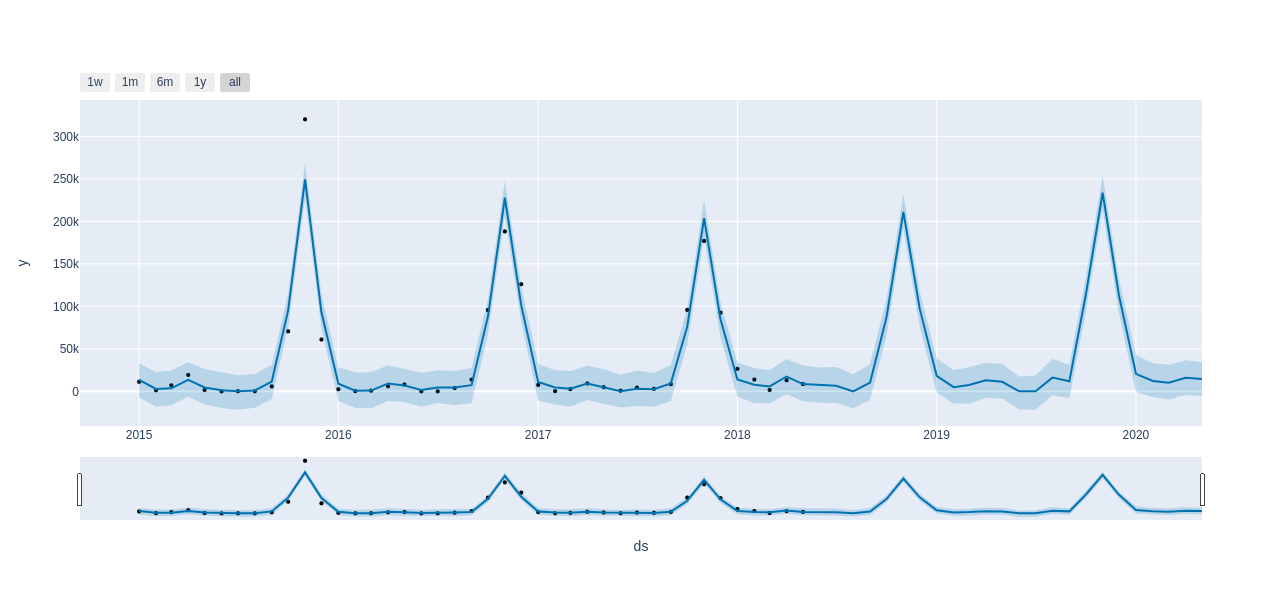

In [21]:
plot_plotly(model, forecast)

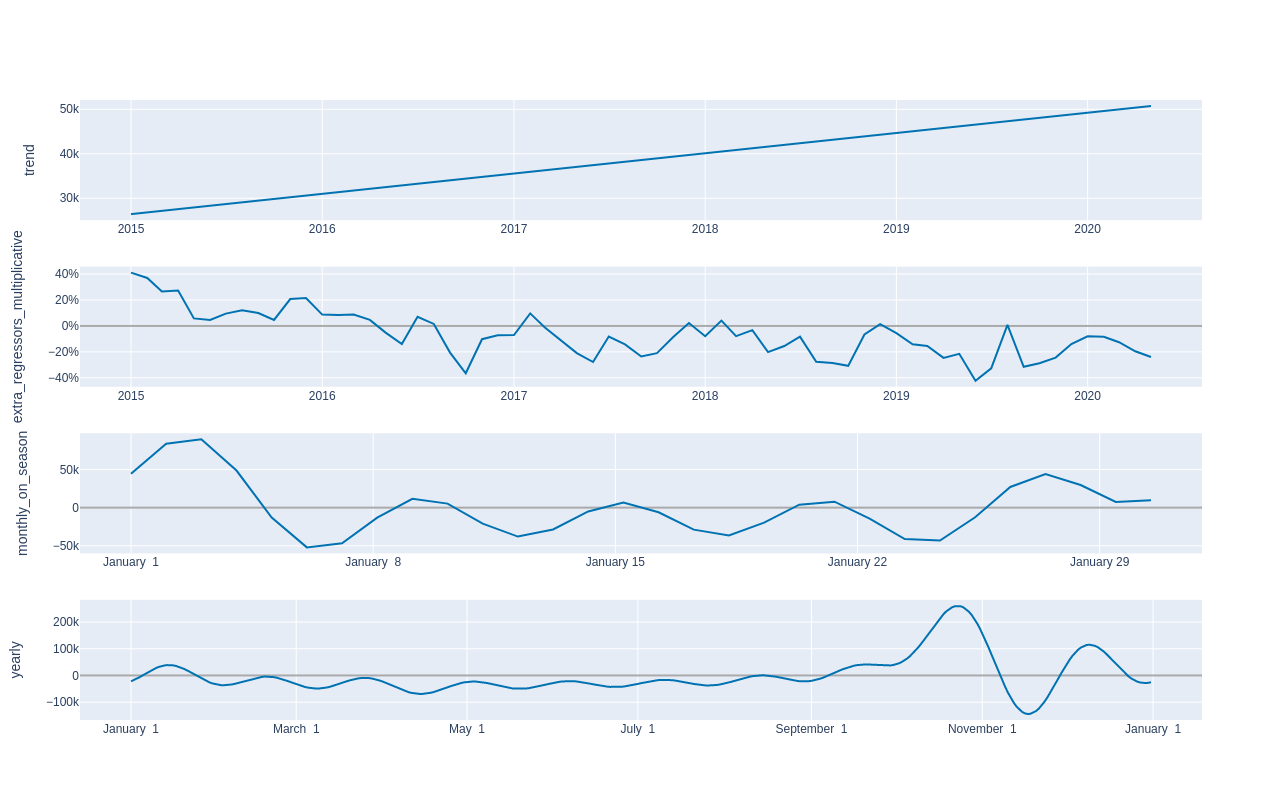

In [22]:
plot_components_plotly(model, forecast)